![COUR_IPO.png](attachment:COUR_IPO.png)

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans.

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021.

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active.

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [ ]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.gpu_device_name():
  print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [ ]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np
import gc

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Import any other packages you may want to use
# import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [ ]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

Training Data Preview:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other 

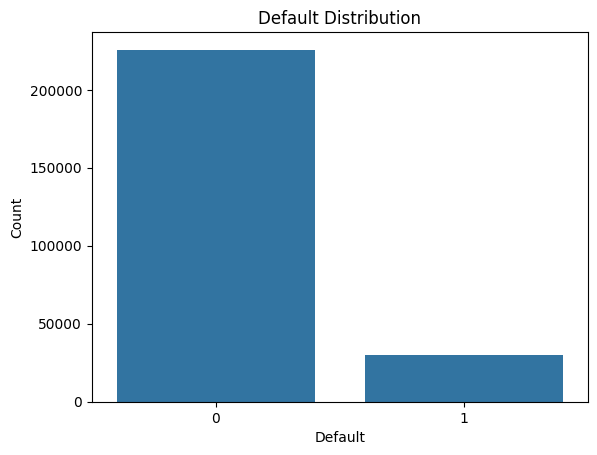

In [ ]:
# Display the first few rows of the training dataset
print("Training Data Preview:")
print(train_df.head())

# Display the first few rows of the test dataset
print("\nTest Data Preview:")
print(test_df.head())

# Get the shape of the datasets
print("\nTraining Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# Summary of the training dataset
print("\nTraining Data Summary:")
print(train_df.info())

# Check for missing values in the training dataset
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Descriptive statistics for numerical features in the training dataset
print("\nDescriptive Statistics for Training Data:")
print(train_df.describe())

# Check the distribution of the target variable (assumed to be 'churn')
if 'Default' in train_df.columns:
    print("\nDefault Distribution in Training Data:")
    print(train_df['Default'].value_counts(normalize=True))

# Visualize the distribution of the target variable using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Default', data=train_df)
plt.title('Default Distribution')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check for duplicates in the entire DataFrame
duplicate_rows = train_df[train_df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Display the duplicate rows (optional)
print("\nDuplicate Rows:")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate Rows:
Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default]
Index: []


In [ ]:
# prompt: find categorical columns

categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
categorical_cols

Categorical columns:


['LoanID',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [ ]:
categorical_cols.remove('LoanID')

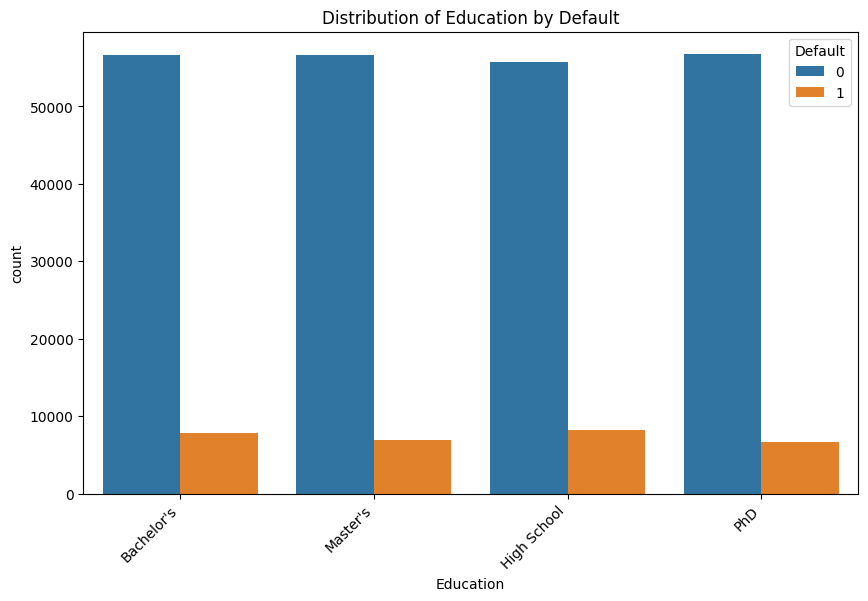

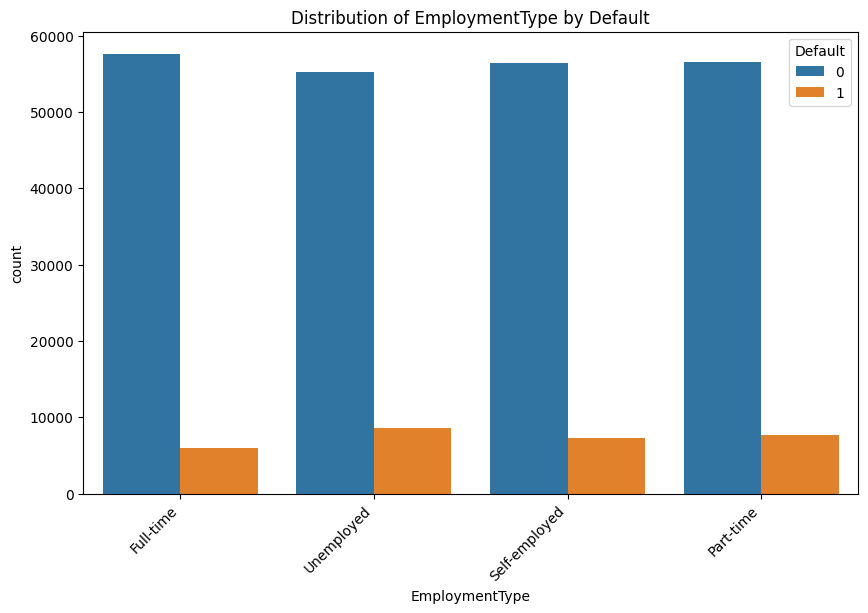

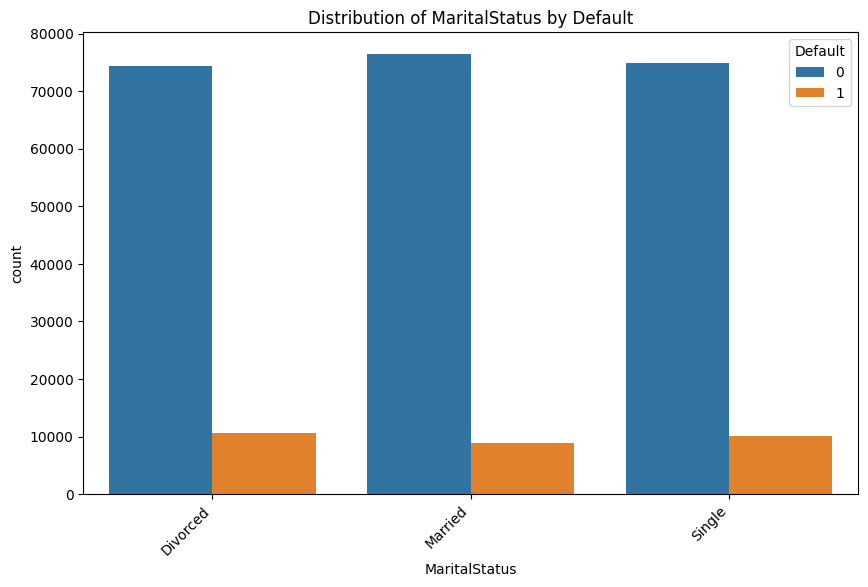

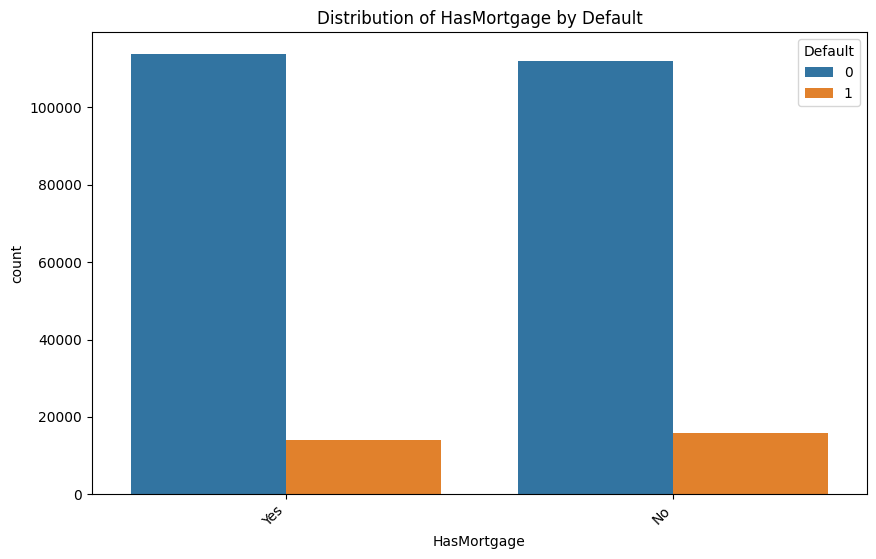

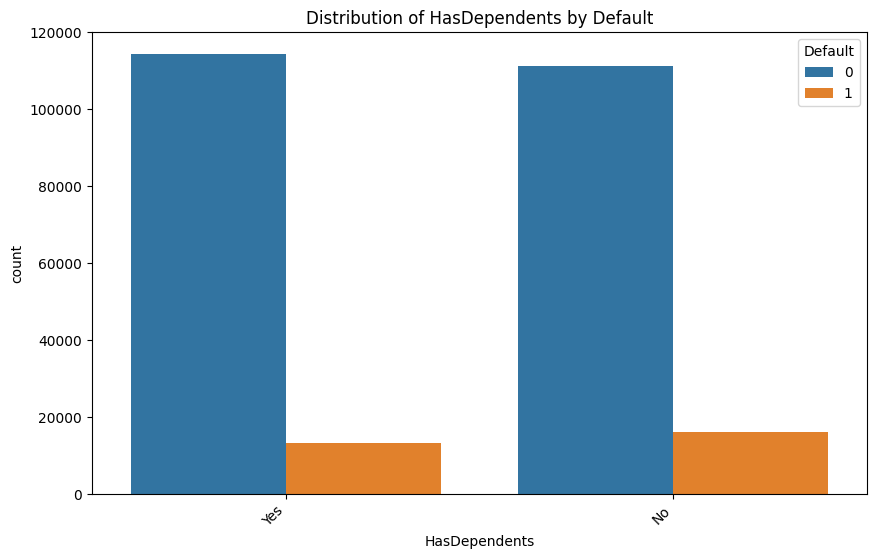

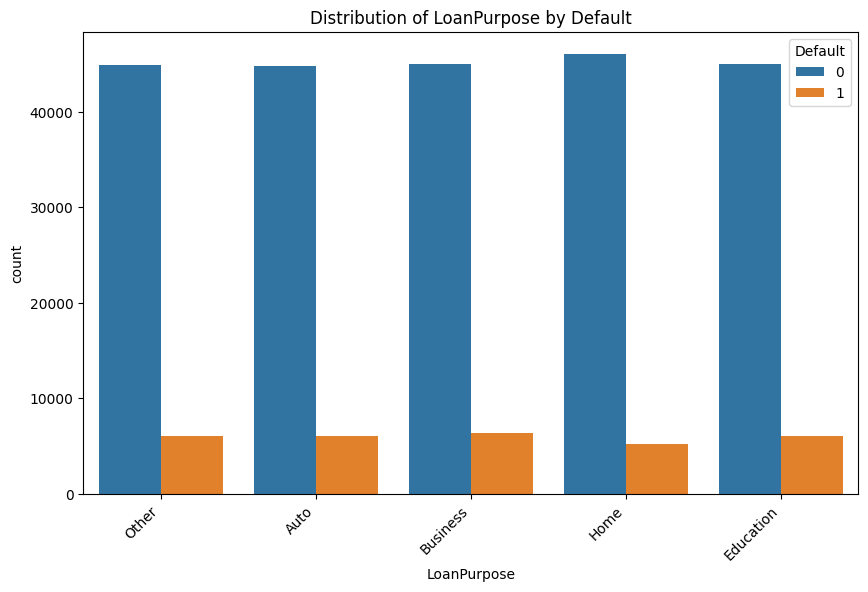

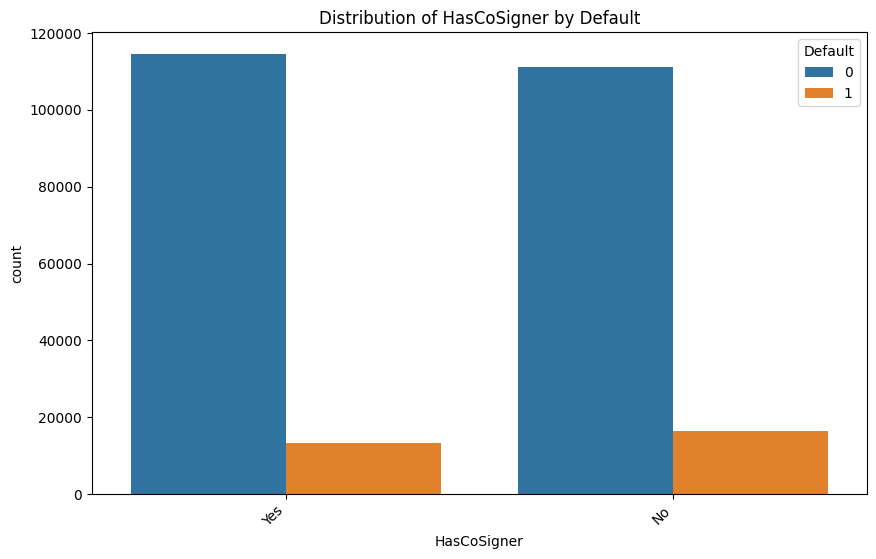

In [ ]:
# Explore the train data set of different categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Default', data=train_df)
    plt.title(f'Distribution of {col} by Default')
    plt.xticks(rotation=45, ha='right')
    plt.show()

--- Exploring column: Age ---
count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64
Number of unique values: 52
Missing values: 0


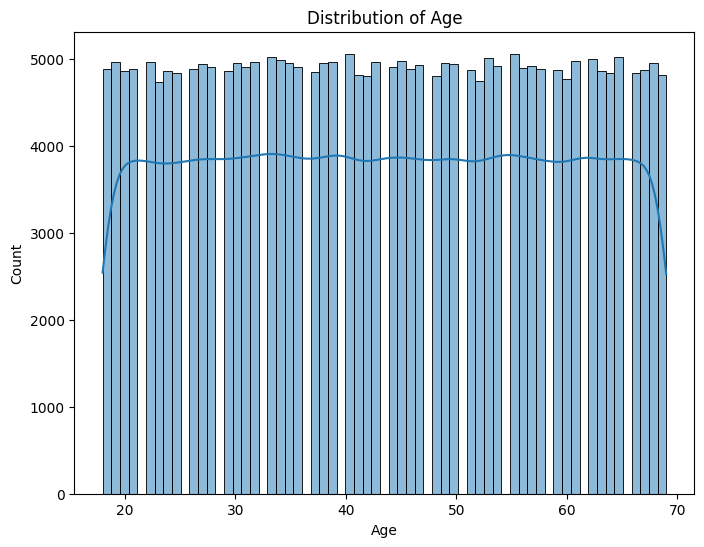

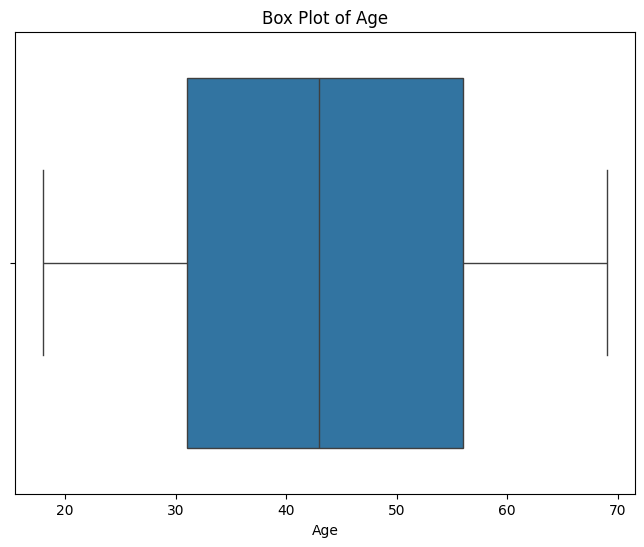

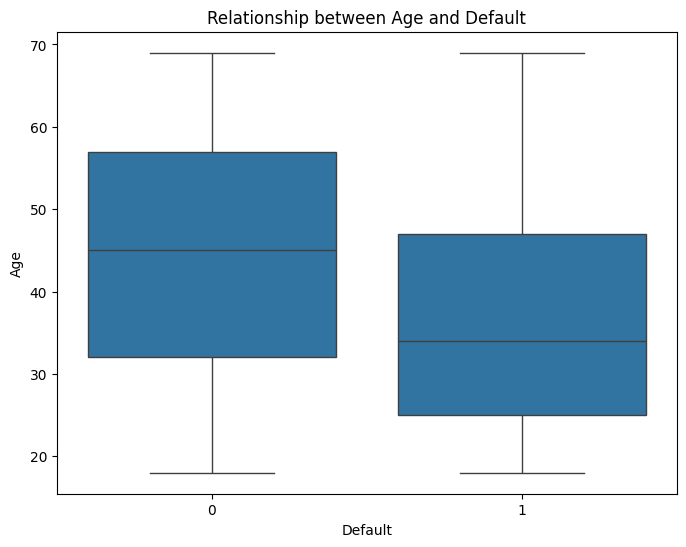

--- Exploring column: Income ---
count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64
Number of unique values: 114620
Missing values: 0


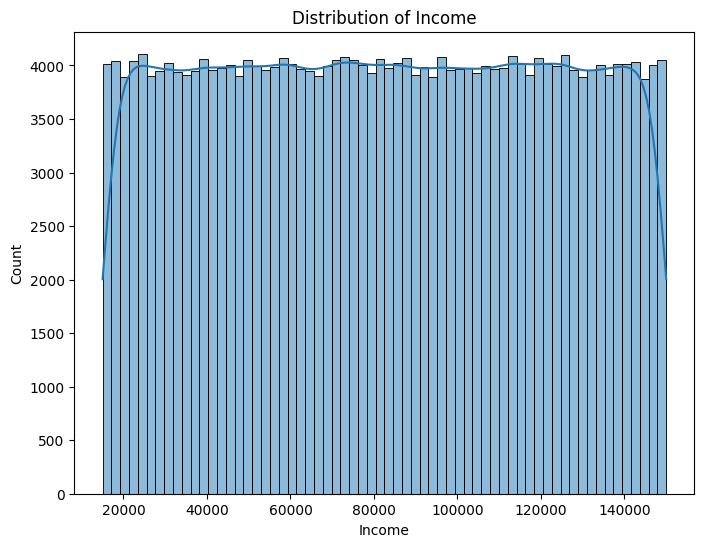

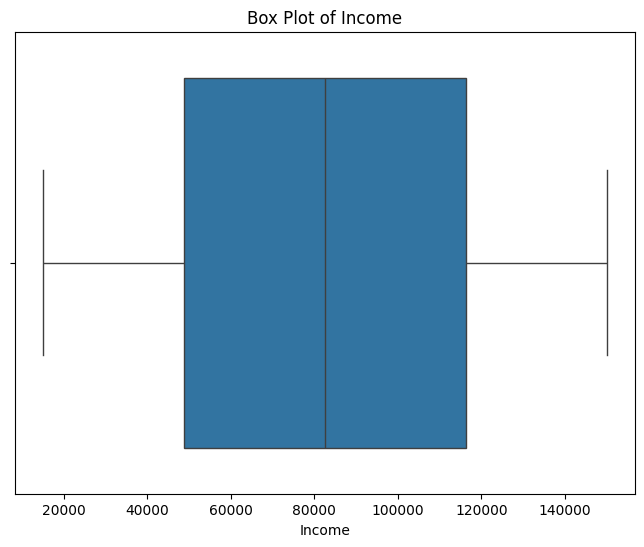

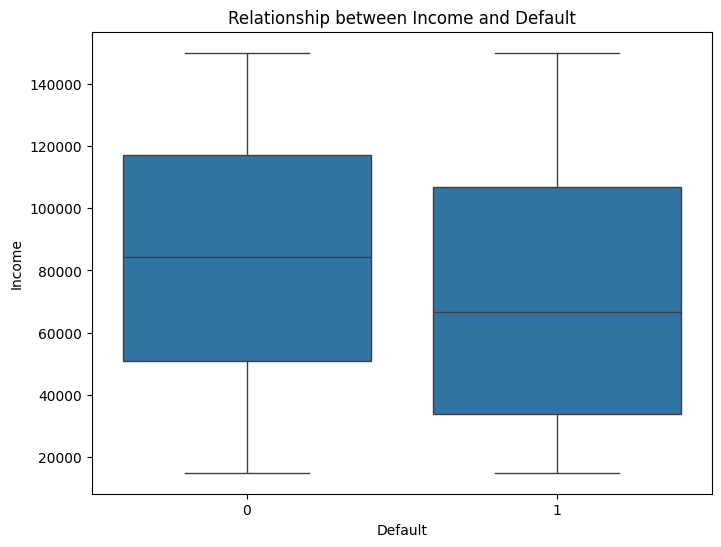

--- Exploring column: LoanAmount ---
count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64
Number of unique values: 158729
Missing values: 0


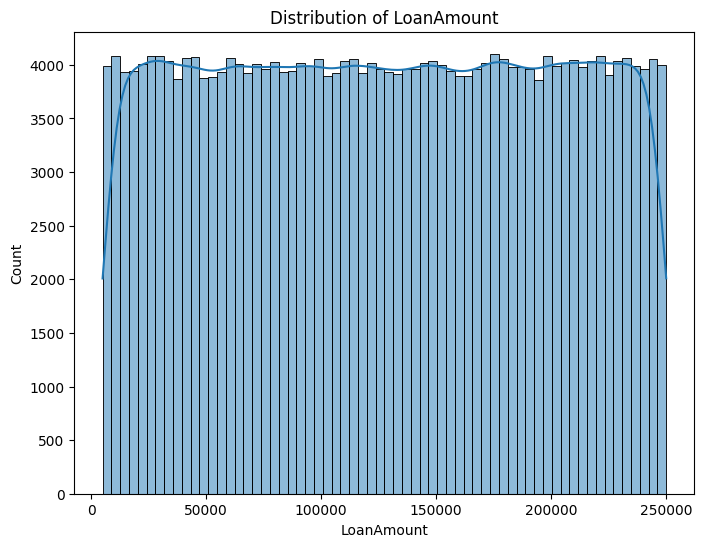

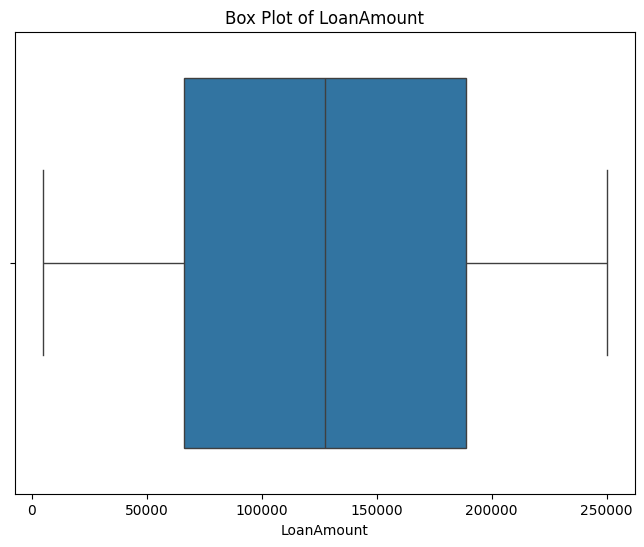

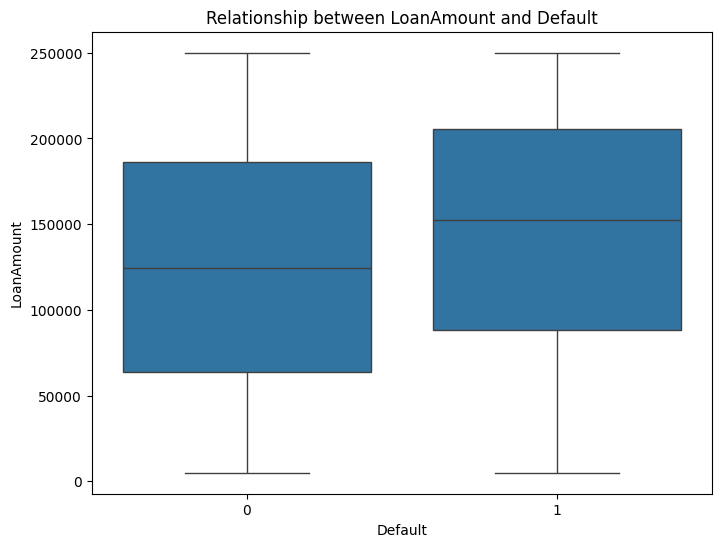

--- Exploring column: CreditScore ---
count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64
Number of unique values: 550
Missing values: 0


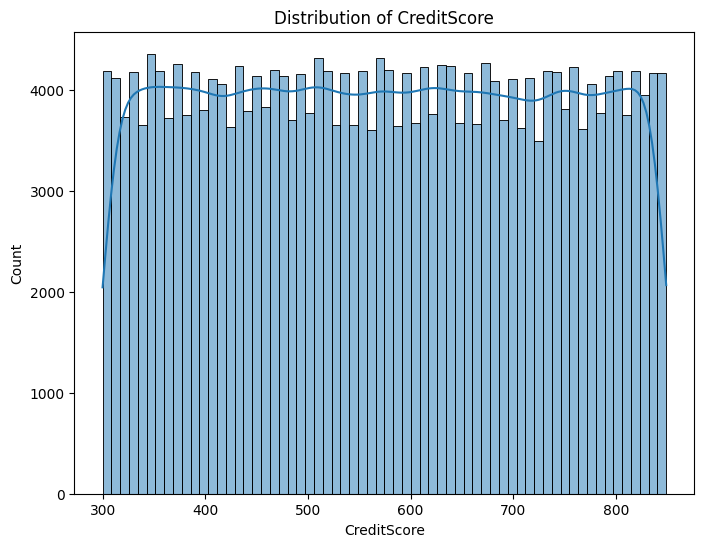

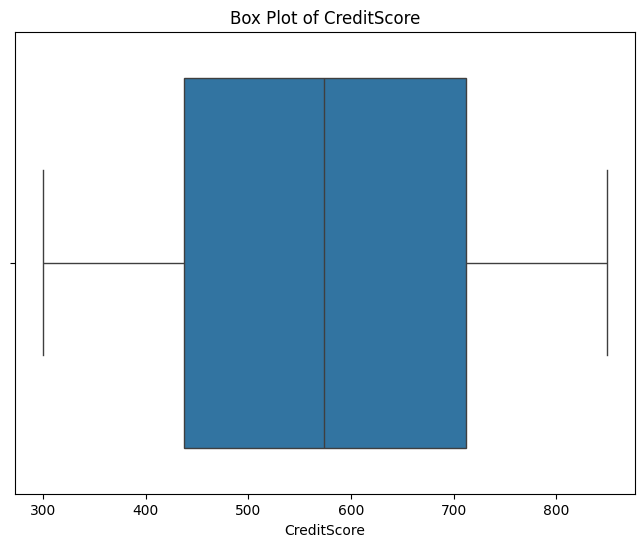

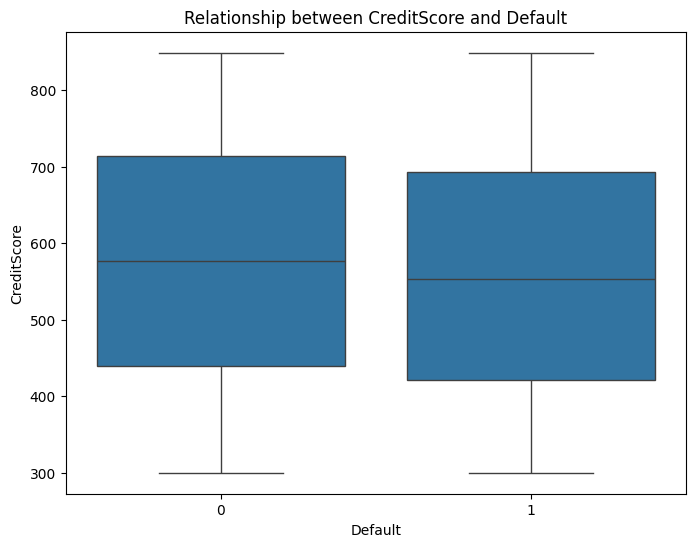

--- Exploring column: MonthsEmployed ---
count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64
Number of unique values: 120
Missing values: 0


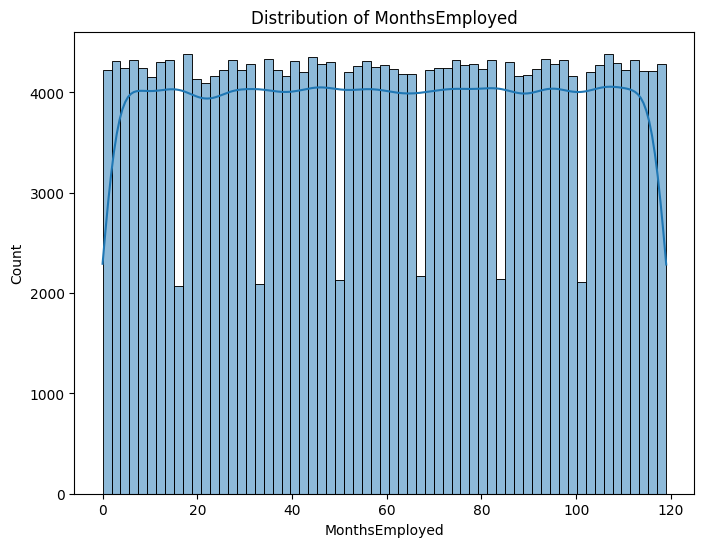

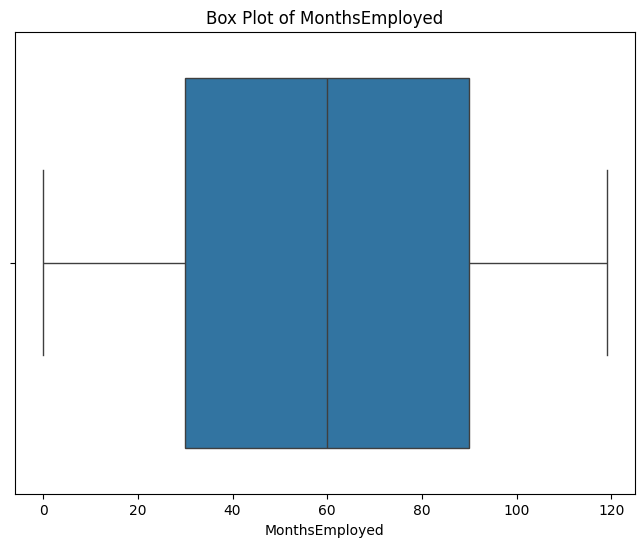

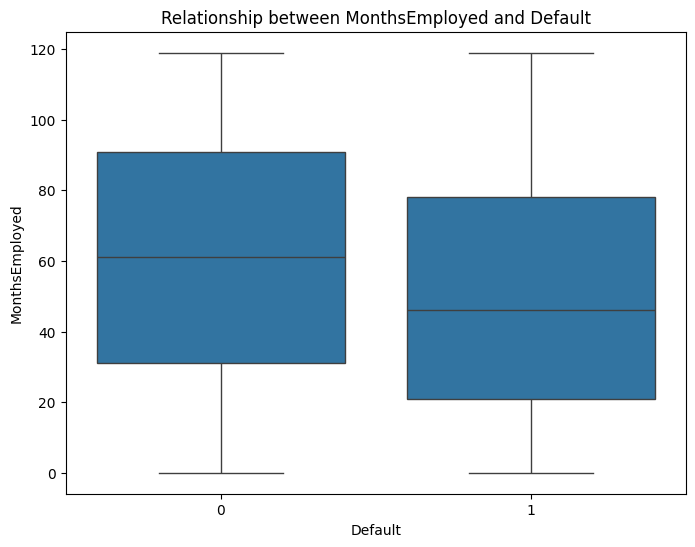

--- Exploring column: NumCreditLines ---
count    255347.000000
mean          2.501036
std           1.117018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: NumCreditLines, dtype: float64
Number of unique values: 4
Missing values: 0


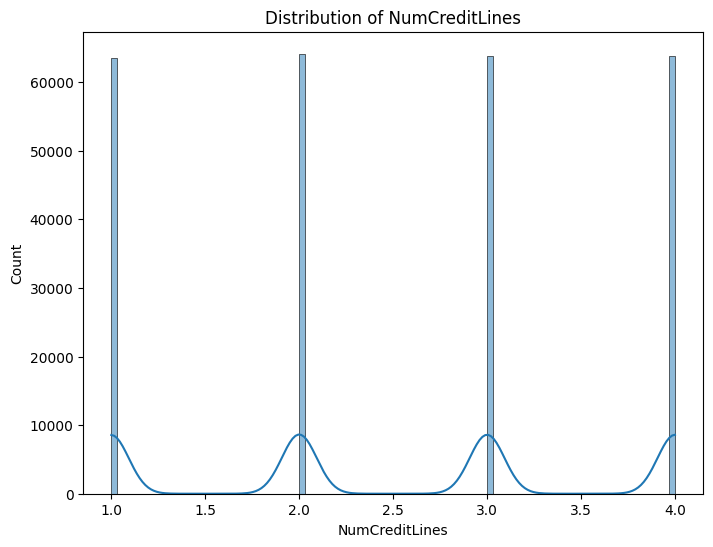

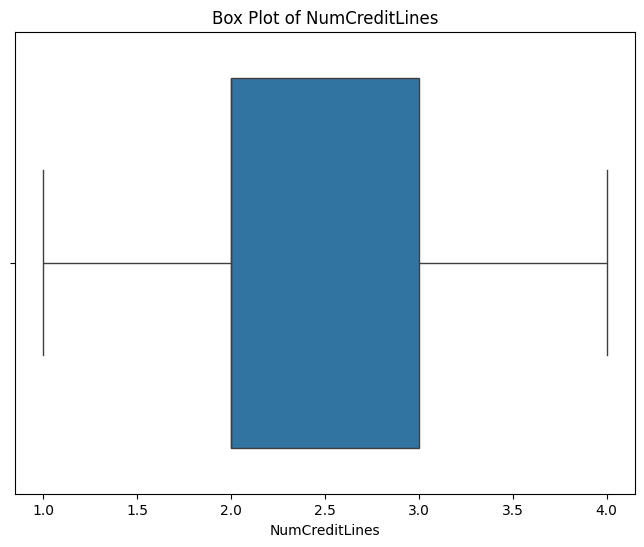

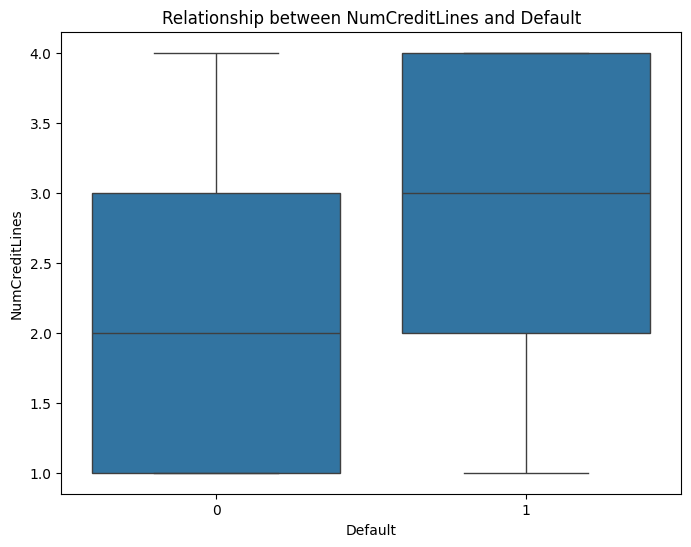

--- Exploring column: InterestRate ---
count    255347.000000
mean         13.492773
std           6.636443
min           2.000000
25%           7.770000
50%          13.460000
75%          19.250000
max          25.000000
Name: InterestRate, dtype: float64
Number of unique values: 2301
Missing values: 0


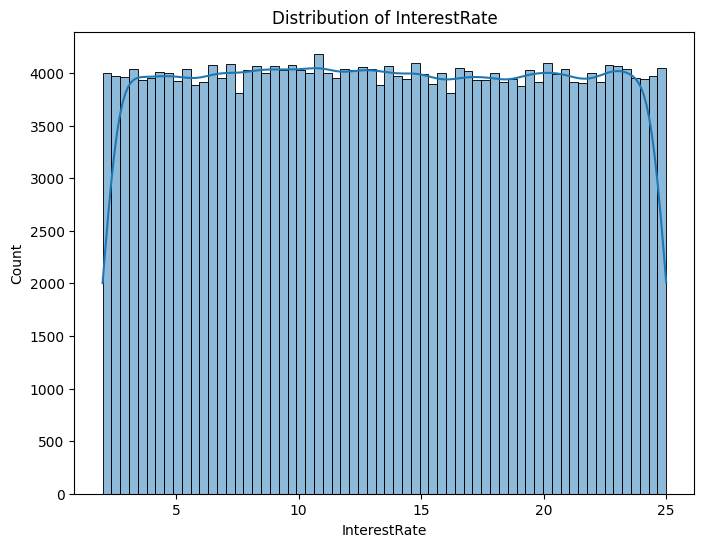

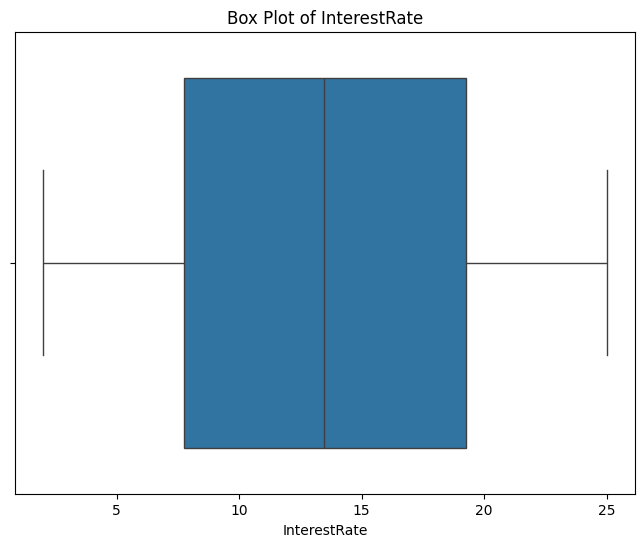

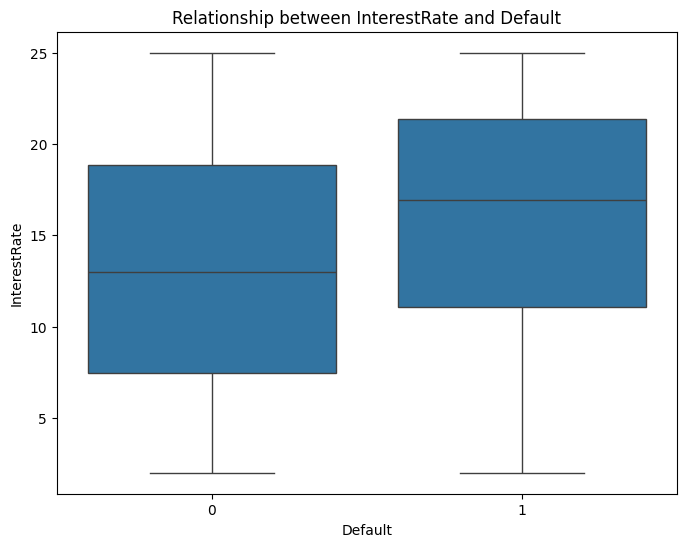

--- Exploring column: LoanTerm ---
count    255347.000000
mean         36.025894
std          16.969330
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: LoanTerm, dtype: float64
Number of unique values: 5
Missing values: 0


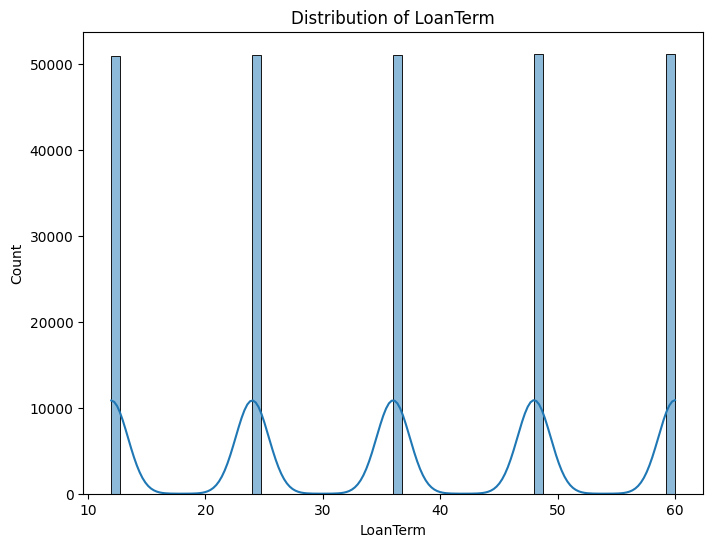

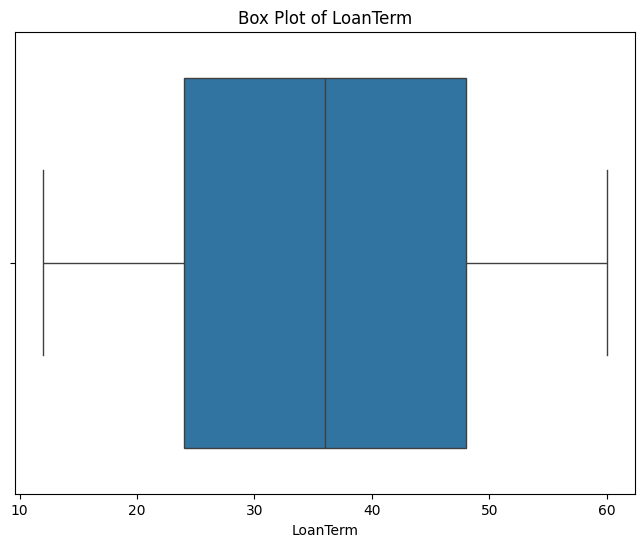

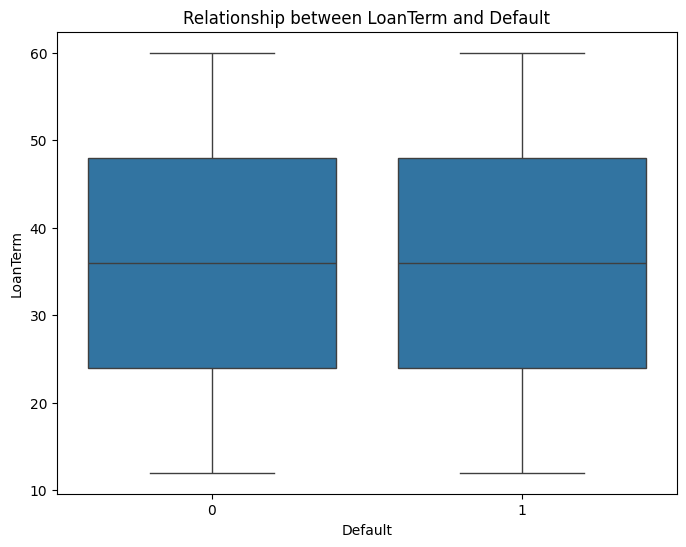

--- Exploring column: DTIRatio ---
count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64
Number of unique values: 81
Missing values: 0


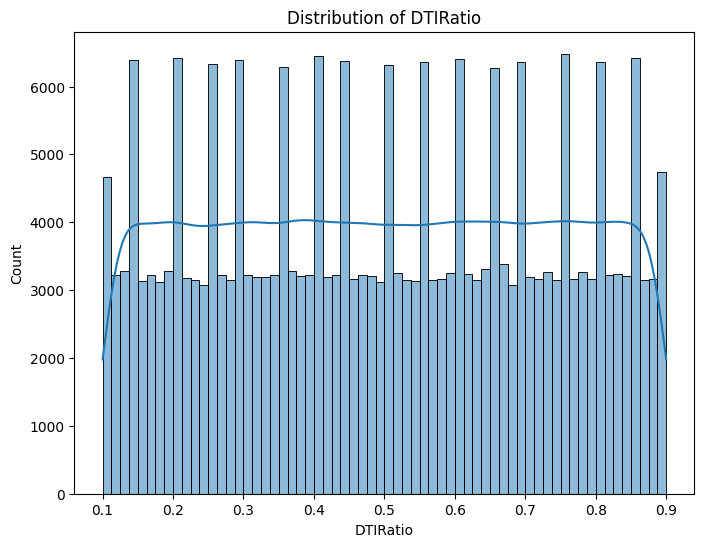

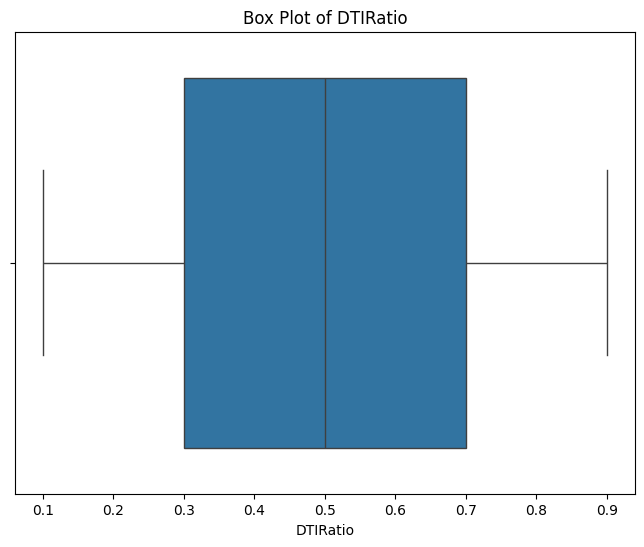

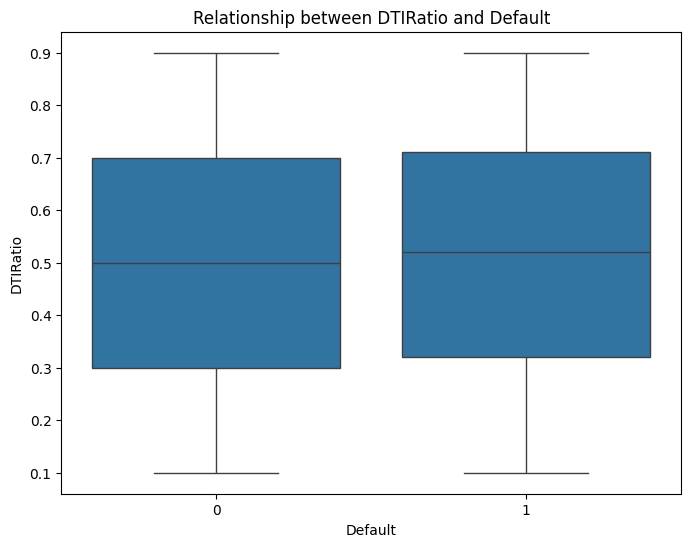

--- Exploring column: Default ---
count    255347.000000
mean          0.116128
std           0.320379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Default, dtype: float64
Number of unique values: 2
Missing values: 0


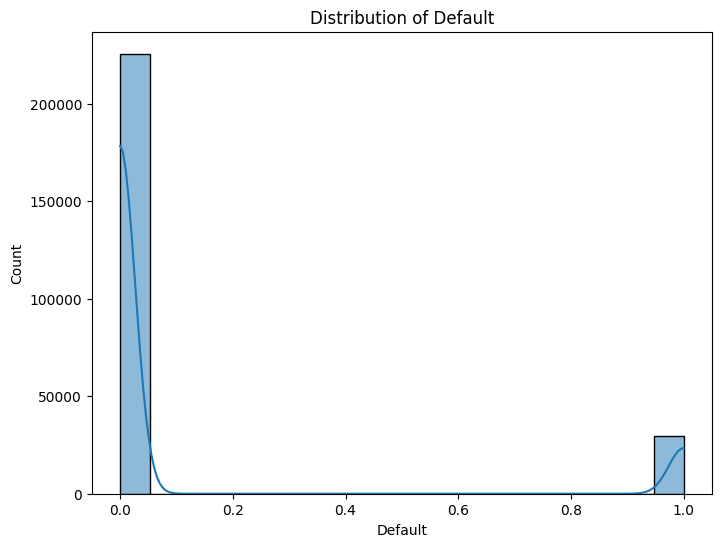

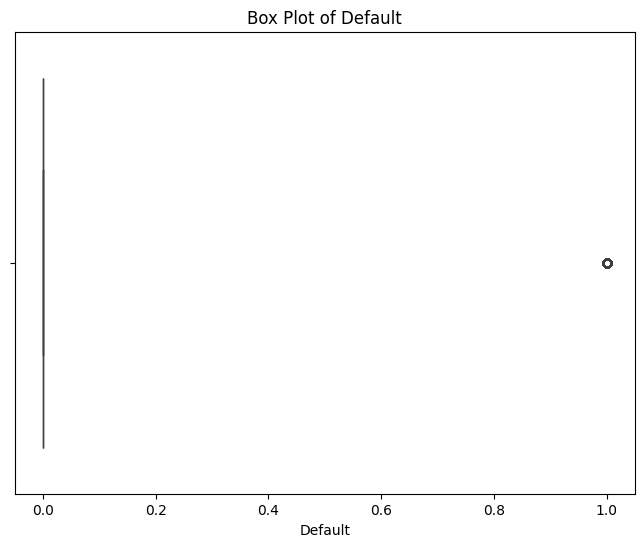

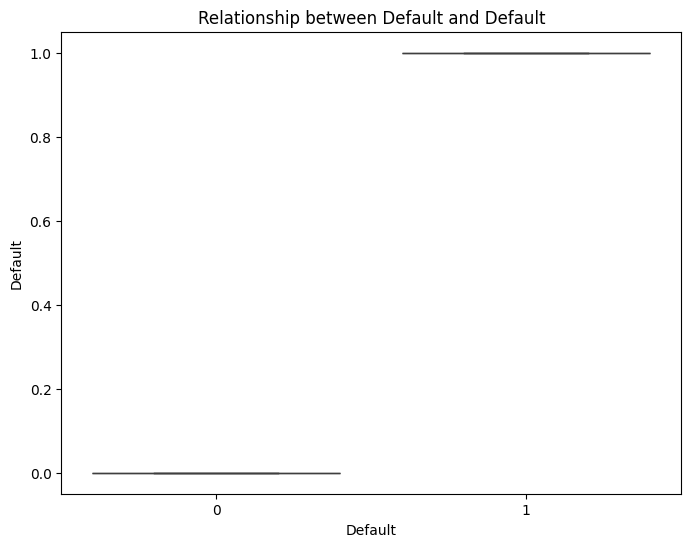

In [ ]:
# Explore the train data set of different numerical columns


numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# Exploring numerical columns
for col in numerical_cols:
    print(f"--- Exploring column: {col} ---")
    print(train_df[col].describe())  # Basic statistics
    print(f"Number of unique values: {train_df[col].nunique()}")
    print(f"Missing values: {train_df[col].isnull().sum()}")

    # Visualization (histogram)
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[col], kde=True)  # KDE for smoother density plot
    plt.title(f'Distribution of {col}')
    plt.show()

    # Boxplot to show outliers
    plt.figure(figsize=(8,6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

    # Relationship with target variable ('Default' is your target)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Default', y=col, data=train_df)  # Boxplot by Churn
    plt.title(f'Relationship between {col} and Default')
    plt.show()

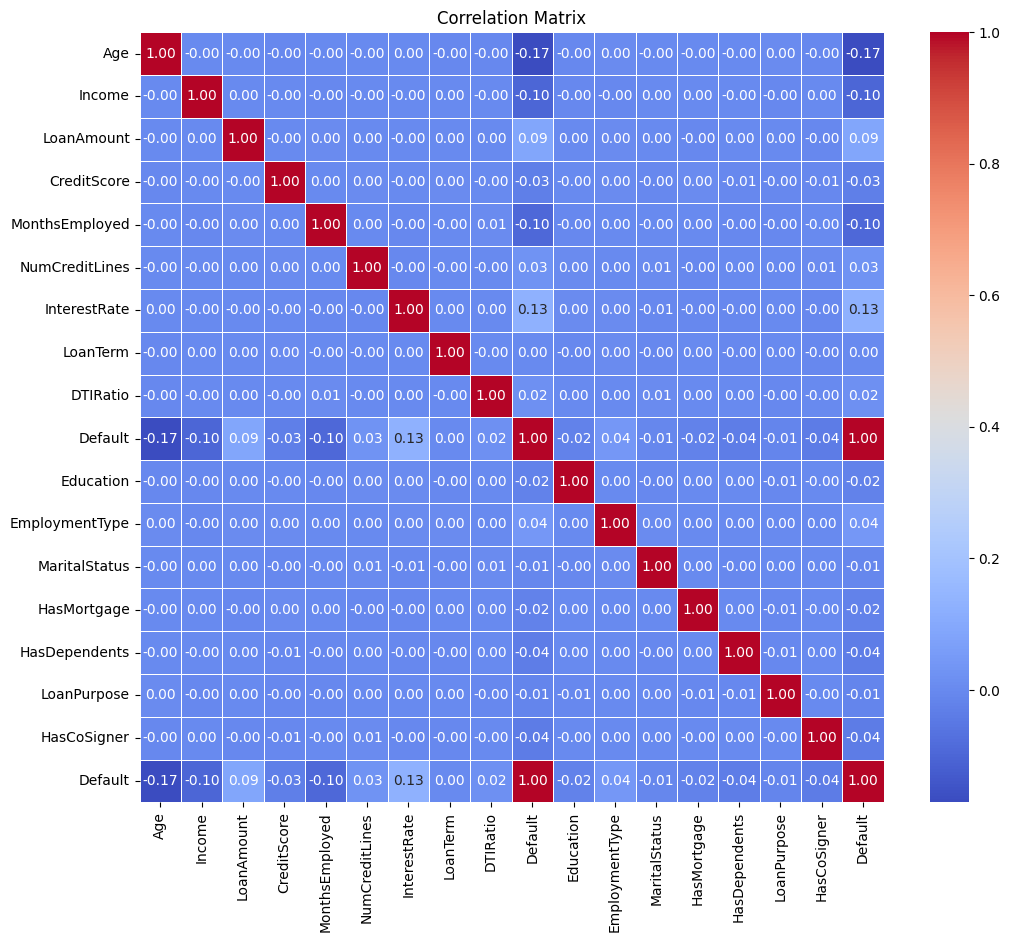

In [ ]:
from scipy import stats as ss
from sklearn.preprocessing import LabelEncoder
# Assuming 'train_df' is your DataFrame

# ... (cramers_v and correlation_ratio functions remain the same) ...

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate correlation ratio for numerical-categorical correlation
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        y_avg_array[i] = measurements[fcat == i].mean()
        n_array[i] = measurements[fcat == i].count()
    y_total_avg = measurements.mean()
    numerator = np.sum(n_array * (y_avg_array - y_total_avg)**2)
    denominator = np.sum((measurements - y_total_avg)**2)
    if denominator == 0:
        return 0
    else:
        return np.sqrt(numerator / denominator)

train_df_encoded = train_df.copy()
test_df_encoded = test_df.copy()


numerical_features_train = train_df_encoded.select_dtypes(include=np.number).columns.tolist()
categorical_features_train = train_df_encoded.select_dtypes(include=['object']).columns.tolist()

# Remove 'LoanID' if present
numerical_features_train = [f for f in numerical_features_train if f not in ['LoanID']]
categorical_features_train = [f for f in categorical_features_train if f not in ['LoanID']]

# Label encoding for train_df_encoded and test_df_encoded
for feature in categorical_features_train:
    le = LabelEncoder()
    # Fit on train_df_encoded to learn encoding
    train_df_encoded[feature] = le.fit_transform(train_df_encoded[feature])
    # Transform test_df_encoded using the same encoding
    try:
        test_df_encoded[feature] = le.transform(test_df_encoded[feature])
    except KeyError:
        print(f"Feature '{feature}' not found in test_df_encoded, skipping")
    except ValueError as e:
        print(f"Error encoding feature '{feature}' in test_df_encoded: {e}")
        # Handle the error, e.g., by imputing missing values or dropping the feature

# Include 'Default' in the correlation matrix calculation
all_features = numerical_features_train + categorical_features_train + ['Default']
corr_matrix = train_df_encoded[all_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
test_df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,1,0,0,1,0,4,0
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,1,2,2,0,0,1,1
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,0,0,2,1,1,4,1
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,0,3,0,0,0,1,0
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,3,3,2,1,0,0,0


## Feature engineering/ Scaling as well as label encoder

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create copies of the original DataFrames
train_df_processed = train_df.copy()
test_df_processed = test_df.copy()

# 1. Feature Engineering for Numerical Columns
def numerical_feature_engineering(df):
    df['TotalDebt'] = df['LoanAmount'] * df['InterestRate']
    df['IncomeToLoanRatio'] = df['Income'] / df['LoanAmount']
    df['CreditScoreToIncomeRatio'] = df['CreditScore'] / df['Income']
    df['LoanTermToEmploymentRatio'] = df['LoanTerm'] / df['MonthsEmployed']
    df['DebtToIncomePerCreditLine'] = df['DTIRatio'] / df['NumCreditLines']
    return df

train_df_processed = numerical_feature_engineering(train_df_processed)
test_df_processed = numerical_feature_engineering(test_df_processed)


# Replace 'inf' with NaN in 'LoanTermToEmploymentRatio' column
train_df_processed['LoanTermToEmploymentRatio'] = train_df_processed['LoanTermToEmploymentRatio'].replace([np.inf, -np.inf], np.nan)
test_df_processed['LoanTermToEmploymentRatio'] = test_df_processed['LoanTermToEmploymentRatio'].replace([np.inf, -np.inf], np.nan)

# Impute NaN values with a suitable strategy (e.g., mean, median)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Choose your strategy
train_df_processed['LoanTermToEmploymentRatio'] = imputer.fit_transform(train_df_processed[['LoanTermToEmploymentRatio']])
test_df_processed['LoanTermToEmploymentRatio'] = imputer.transform(test_df_processed[['LoanTermToEmploymentRatio']])


# 2. Scaling for Numerical Columns
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                      'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                      'LoanTerm', 'DTIRatio', 'TotalDebt', 'IncomeToLoanRatio',
                      'CreditScoreToIncomeRatio', 'LoanTermToEmploymentRatio',
                      'DebtToIncomePerCreditLine']
scaler = StandardScaler()
train_df_processed[numerical_features] = scaler.fit_transform(train_df_processed[numerical_features])
test_df_processed[numerical_features] = scaler.transform(test_df_processed[numerical_features])


# 3. Label Encoding for Categorical Columns
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus',
                        'LoanPurpose', 'HasDependents', 'HasMortgage', 'HasCoSigner']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    train_df_processed[feature] = label_encoders[feature].fit_transform(train_df_processed[feature])
    test_df_processed[feature] = label_encoders[feature].transform(test_df_processed[feature])

# Now you have:
# - train_df: Original training DataFrame
# - test_df: Original test DataFrame
# - train_df_processed: Preprocessed training DataFrame
# - test_df_processed: Preprocessed test DataFrame

In [ ]:
train_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanID                     255347 non-null  object 
 1   Age                        255347 non-null  float64
 2   Income                     255347 non-null  float64
 3   LoanAmount                 255347 non-null  float64
 4   CreditScore                255347 non-null  float64
 5   MonthsEmployed             255347 non-null  float64
 6   NumCreditLines             255347 non-null  float64
 7   InterestRate               255347 non-null  float64
 8   LoanTerm                   255347 non-null  float64
 9   DTIRatio                   255347 non-null  float64
 10  Education                  255347 non-null  int64  
 11  EmploymentType             255347 non-null  int64  
 12  MaritalStatus              255347 non-null  int64  
 13  HasMortgage                25

In [ ]:
test_df_processed.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,TotalDebt,IncomeToLoanRatio,CreditScoreToIncomeRatio,LoanTermToEmploymentRatio,DebtToIncomePerCreditLine
0,7RYZGMKJIR,-0.767053,1.261345,-1.182682,1.433169,-1.054806,-0.448549,-1.113968,-0.708685,-1.603231,...,0,1,0,4,0,-1.069926,0.756591,-0.470337,-0.133248,-0.975047
1,JDL5RH07AM,1.167540,1.329794,-1.541163,-1.291754,0.792592,-0.448549,-0.075760,1.412793,0.388833,...,2,0,0,1,1,-1.090630,2.684186,-0.894697,-0.214826,0.172937
2,STAL716Y79,0.767279,0.854907,0.341543,-0.070888,-1.632118,0.446694,-1.202872,0.705634,1.384866,...,2,1,1,4,1,-0.650900,-0.250436,-0.626476,3.315165,0.064794
3,SO0KKJ3IQB,0.967410,0.320066,-1.013400,-1.493134,-1.025941,-1.343791,1.572717,-0.001526,1.168337,...,0,0,0,1,0,-0.283677,0.171307,-0.793053,-0.027991,2.543774
4,T99CWTYDCP,1.300960,-0.276476,0.878298,-0.775718,-0.217704,0.446694,1.289432,0.705634,-0.260753,...,2,1,0,0,0,1.814728,-0.423361,-0.445522,-0.161008,-0.567430


# Resolve imbalance using GAN

In [ ]:
# Define the generator network
def make_generator_model(latent_dim, n_features):
    model = keras.Sequential()
    model.add(layers.Dense(256, activation="relu", input_dim=latent_dim))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(n_features, activation="sigmoid"))  # Output layer
    return model

In [ ]:
def make_discriminator_model(n_features):
    model = keras.Sequential()
    model.add(layers.Dense(512, activation="relu", input_dim=n_features))
    model.add(layers.Dropout(0.3))  # Add dropout for regularization
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.3))  # Add dropout for regularization
    model.add(layers.Dense(1, activation="sigmoid"))  # Output layer (binary classification)
    return model

In [ ]:
# Assuming your DataFrame is named 'train_df_processed' and the target variable is 'Default'
X = train_df_processed.drop(['Default', 'LoanID'], axis=1)  # Features
y = train_df_processed['Default']  # Target variable

# Separate minority and majority class data
minority_class_data = X[y == 1]
majority_class_data = X[y == 0]

In [ ]:
# Get the number of features
n_features = X.shape[1]
print(n_features)

# Define latent dimension for the generator
latent_dim = 100  # Adjust as needed

21


In [ ]:
# Create the generator and discriminator instances
generator = make_generator_model(latent_dim, n_features)
discriminator = make_discriminator_model(n_features)

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create the combined GAN model (for training the generator)
z = keras.Input(shape=(latent_dim,))
generated_data = generator(z)

discriminator.trainable = False  # Freeze discriminator during generator training
validity = discriminator(generated_data)
combined_model = keras.Model(z, validity)
combined_model.compile(loss='binary_crossentropy', optimizer='adam')

# Training loop
epochs = 10000  # Adjust as needed
batch_size = 8
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, minority_class_data.shape[0], batch_size)
    real_data = minority_class_data.iloc[idx].values
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_data, valid)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (through the combined model)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = combined_model.train_on_batch(noise, valid)
    gc.collect()

    # Print progress (optional)
    if epoch % 100 == 0:
        keras.backend.clear_session()
        print(f"Epoch: {epoch}, D loss: {d_loss[0]}, G loss: {g_loss}")

num_synthetic_samples = majority_class_data.shape[0] - minority_class_data.shape[0]
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
synthetic_data = generator.predict(noise)

# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
synthetic_df['Default'] = 1  # Assign the minority class label

# Concatenate the original and synthetic data
balanced_df = pd.concat([train_df_processed, synthetic_df], ignore_index=True)

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now you have a balanced DataFrame named 'balanced_df'
print(balanced_df.shape)
print(balanced_df['Default'].value_counts())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0, D loss: 0.6467206478118896, G loss: [array(0.6657659, dtype=float32), array(0.6657659, dtype=float32), array(0.5, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━

Exception ignored in: <function _xla_gc_callback at 0x7ae368b879a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
balanced_df = pd.read_csv("balanced_train.csv")

In [ ]:
# Resolve class imbalance issue

# Assuming your DataFrame is named 'train_df_encoded' and the target variable is 'Default'
X = train_df_processed.drop(['Default', 'LoanID'], axis=1)  # Features
y = train_df_processed['Default']  # Target variable

# Create a SMOTE object
smote = SMOTE(random_state=42)  # You can change the random_state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
train_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_df_resampled['Default'] = y_resampled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
train_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        451388 non-null  float64
 1   Income                     451388 non-null  float64
 2   LoanAmount                 451388 non-null  float64
 3   CreditScore                451388 non-null  float64
 4   MonthsEmployed             451388 non-null  float64
 5   NumCreditLines             451388 non-null  float64
 6   InterestRate               451388 non-null  float64
 7   LoanTerm                   451388 non-null  float64
 8   DTIRatio                   451388 non-null  float64
 9   Education                  451388 non-null  int64  
 10  EmploymentType             451388 non-null  int64  
 11  MaritalStatus              451388 non-null  int64  
 12  HasMortgage                451388 non-null  int64  
 13  HasDependents              45

In [ ]:
train_df_resampled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,TotalDebt,IncomeToLoanRatio,CreditScoreToIncomeRatio,LoanTermToEmploymentRatio,DebtToIncomePerCreditLine,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,...,1,1,4,1,-0.699373,0.170237,-0.476072,-2.700814e-01,-0.750442,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,...,0,0,4,1,-0.825927,-0.411077,-0.091068,5.484154e-01,2.094563,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,...,1,1,0,0,0.747024,-0.300371,-0.563759,-1.610076e-01,-0.783717,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,...,0,0,1,0,-1.033431,-0.275195,1.729198,-5.119516e-17,-0.916816,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,...,0,1,0,0,-1.222827,0.411050,2.686360,1.009540e+00,-0.388577,0


In [ ]:
# Shuffle the DataFrame
train_df_resampled = train_df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_df_resampled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,TotalDebt,IncomeToLoanRatio,CreditScoreToIncomeRatio,LoanTermToEmploymentRatio,DebtToIncomePerCreditLine,Default
0,0.104991,-1.605004,-1.259599,0.132821,0.238040,-0.448549,1.332761,-0.848077,-1.639251,1,...,1,0,2,0,-0.638555,-0.356526,2.544774,-0.299843,-0.995804,1
1,0.701065,1.447304,-0.848450,0.279296,-0.124967,1.341937,0.087935,-0.051662,-0.434298,0,...,0,0,3,0,-0.565306,0.343726,-0.674959,-0.226856,-0.800447,1
2,-1.367444,-0.872966,0.806616,-1.153306,-1.170269,-1.343791,0.807245,-1.415845,-1.126868,0,...,0,0,3,0,1.297070,-0.475190,-0.220141,-0.228216,-0.101581,0
3,-1.434155,0.252694,-1.366941,-1.373565,-0.939344,1.341937,0.900669,1.412793,-1.646537,0,...,1,0,1,0,-0.825906,0.755637,-0.754152,0.138527,-1.149741,1
4,0.300309,-1.602454,1.442551,-1.398737,-0.708419,1.341937,0.740945,1.412793,1.211643,1,...,1,1,2,0,1.847875,-0.553842,0.982669,0.021415,-0.326187,0


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

## using logistic regression

In [ ]:
# ... (import statements and other code) ...
from sklearn.linear_model import LogisticRegression

# If using balanced_df:
X = balanced_df.drop(['Default', 'LoanID'], axis=1)  # Features
y = balanced_df['Default']  # Target variable

# ... (rest of the code for GridSearchCV and model training) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['elasticnet'],  # Regularization type
    'intercept_scaling': [0.5, 1, 2],
    'warm_start': [True, False],
    'l1_ratio': [0.1, 0.5, 0.9],
    # 'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse)
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'class_weight': [{0: 1, 1: w} for w in [2, 5, 10]],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [100, 200, 500],
}

# Create GridSearchCV object with 'roc_auc' scoring
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=3, n_jobs= -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


KeyboardInterrupt: 

In [ ]:
X_test_final = test_df_processed.drop(['LoanID'], axis=1)
predicted_probability_final = best_model.predict_proba(X_test_final)[:, 1]

# Create prediction_df
prediction_df = pd.DataFrame({'LoanID': test_df_encoded['LoanID'],
                             'predicted_probability': predicted_probability_final})

# Save to CSV for submission
prediction_df.to_csv("prediction_submission_LR_with_feature_eng.csv", index=False)

## Using random forest classifier with searchCV

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV




# Assuming 'train_df_encoded' is your DataFrame and 'Default' is the target variable
# X = train_df_encoded.drop(['Default', 'LoanID'], axis=1)  # Features
# y = train_df_encoded['Default']  # Target variable

# # Create a SMOTE object
# smote = SMOTE(random_state=42)  # You can change the random_state for reproducibility

# # Apply SMOTE to oversample the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    # Add other hyperparameters you want to tune
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='roc_auc',  # Use ROC AUC as the scoring metric
    cv=5,  # Number of cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


# Evaluate the best model's performance using ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score (Best Model): {roc_auc}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
X_test_final = test_df_encoded.drop(['LoanID'], axis=1)
predicted_probability_final = rf_classifier.predict_proba(X_test_final)[:, 1]

# Create prediction_df
prediction_df = pd.DataFrame({'LoanID': test_df_encoded['LoanID'],
                             'predicted_probability': predicted_probability_final})

# Save to CSV for submission
prediction_df.to_csv("prediction_submission_rf.csv", index=False)

## Using XGBClassifier

In [ ]:

# # Assuming train_df_resampled and test_df_encoded are already loaded and preprocessed

# Separate features (X) and target (y)
X_train_resampled = train_df_resampled.drop('Default', axis=1)
y_train_resampled = train_df_resampled['Default']


# # Instantiate SMOTE
# smote = SMOTE(random_state=42)

# # Resample the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled,
                                                    test_size=0.2, random_state=42)

# Define the model
model = XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
}

# Create GridSearchCV object with 'roc_auc' scoring
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set (predicted probabilities for ROC AUC)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")
print(f"Best Hyperparameters: {best_params}")

# Make predictions on the test_df_encoded data for submission
X_test_final = test_df_processed.drop(['LoanID'], axis=1)
predicted_probability_final = best_model.predict_proba(X_test_final)[:, 1]

# Create prediction_df
prediction_df = pd.DataFrame({'LoanID': test_df_processed['LoanID'],
                             'predicted_probability': predicted_probability_final})

# Save to CSV for submission
prediction_df.to_csv("prediction_submission_xgb.csv", index=False)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.836 total time=  10.4s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.837 total time=   6.9s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.837 total time=   6.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.836 total time=   2.9s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.836 total time=   2.9s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.853 total time=   6.9s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.854 total time=   4.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.853 total time=   4.7s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.853 total time=   6.7s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.855 total t

In [ ]:
from google.colab import files

files.download("prediction_submission_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Using tensorflow neural network

In [ ]:
# !pip install tensorflow==2.12.0 # Or a suitable version for your needs

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 881.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
   

In [ ]:
# !pip install scikeras

In [ ]:
# !pip install --upgrade tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
train_df_resampled.info()

NameError: name 'train_df_resampled' is not defined

In [ ]:
# import tensorflow as tf
from tensorflow import keras
from keras import layers
# from scikeras.wrappers import KerasClassifier  # Use SciKeras instead of tensorflow.keras.wrappers
# from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import Adam  # Or your preferred optimizer

class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.9):
        super(AccuracyCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')  # Get accuracy from logs
        if accuracy is not None and accuracy >= self.threshold:
            print(f"\nReached {self.threshold * 100:.2f}% accuracy, stopping training!")
            self.model.stop_training = True  # Stop training

# Assuming your resampled DataFrame is named 'train_df_resampled'
# and the target variable is 'Default'
X = train_df_resampled.drop('Default', axis=1)  # Features
y = train_df_resampled['Default']  # Target variable


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# param_grid = {
#     'units': [64, 128, 256],
#     'activation': ['relu', 'tanh'],
#     'dropout_rate': [0.2, 0.3, 0.4],
#     'optimizer': ['adam', 'rmsprop'],
#     'learning_rate': [0.01, 0.001, 0.0001],
#     'batch_size': [32, 64, 128],
#     'epochs': [10, 20, 30]
# }


# Define the model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),  # Another dropout layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Another dropout layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Another dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
optimizer = Adam(learning_rate=0.001)  # Set your learning rate here
# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['AUC', 'accuracy'],)  # Using AUC as the evaluation metric

# Create an instance of the callback
accuracy_callback = AccuracyCallback(threshold=0.9)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[accuracy_callback])

# Evaluate the model on the validation set
y_pred_proba = model.predict(X_val)  # Get predicted probabilities
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"ROC AUC on validation set: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - AUC: 0.7962 - accuracy: 0.7247 - loss: 0.5483 - val_AUC: 0.8152 - val_accuracy: 0.7383 - val_loss: 0.5300
Epoch 2/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - AUC: 0.8099 - accuracy: 0.7348 - loss: 0.5327 - val_AUC: 0.8196 - val_accuracy: 0.7401 - val_loss: 0.5342
Epoch 3/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - AUC: 0.8155 - accuracy: 0.7399 - loss: 0.5264 - val_AUC: 0.8206 - val_accuracy: 0.7421 - val_loss: 0.5218
Epoch 4/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8196 - accuracy: 0.7432 - loss: 0.5211 - val_AUC: 0.8255 - val_accuracy: 0.7472 - val_loss: 0.5202
Epoch 5/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - AUC: 0.8215 - accuracy: 0.7448 - loss: 0.5189 - val_AUC: 0.8288 - val_accuracy: 0.7502 - val_loss: 0.5127
Epoch 6/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8251 - accuracy: 0.7484 - loss: 0.5141 - val_AUC: 0.8319 - val_accuracy: 0.7523 - val_loss: 0.5080
Epoch 7/50

## nerual network without resampled

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from keras import layers
# from sklearn.metrics import roc_auc_score

# #
# # and the target variable is 'Default'
# X = train_df_encoded.drop(['Default','LoanID'], axis=1)  # Features
# y = train_df_encoded['Default']  # Target variable

# # Calculate correlations with the target variable
# correlations = X.corrwith(y)

# # Select features with absolute correlation above a threshold (e.g., 0.1)
# selected_features = correlations[abs(correlations) > 0.1].index.tolist()

# # Create a new DataFrame with selected features
# X_selected = X[selected_features]

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# # Define the model
# model = keras.Sequential([
#     layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.2),  # Another dropout layer
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.2),  # Another dropout layer
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),  # Another dropout layer
#     layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['AUC', 'accuracy'])  # Using AUC as the evaluation metric

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# # Evaluate the model on the validation set
# y_pred_proba = model.predict(X_val)  # Get predicted probabilities
# roc_auc = roc_auc_score(y_val, y_pred_proba)
# print(f"ROC AUC on validation set: {roc_auc}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6384/6384 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - AUC: 0.6619 - accuracy: 0.8844 - loss: 0.3448 - val_AUC: 0.6909 - val_accuracy: 0.8845 - val_loss: 0.3358
Epoch 2/10
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - AUC: 0.6754 - accuracy: 0.8836 - loss: 0.3400 - val_AUC: 0.6918 - val_accuracy: 0.8845 - val_loss: 0.3341
Epoch 3/10
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - AUC: 0.6763 - accuracy: 0.8828 - loss: 0.3413 - val_AUC: 0.6910 - val_accuracy: 0.8845 - val_loss: 0.3354
Epoch 4/10
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - AUC: 0.6819 - accuracy: 0.8834 - loss: 0.3388 - val_AUC: 0.6903 - val_accuracy: 0.8845 - val_loss: 0.3343
Epoch 5/10
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - AUC: 0.6799 - accuracy: 0.8836 - loss: 0.3387 - val_AUC: 0.6914 - val_accuracy: 0.8845 - val_loss: 0.3346
Epoch 6/10
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - AUC: 0.6828 - accuracy: 0.8838 - loss: 0.3376 - val_AUC: 0.6909 - val_accuracy: 0.8845 - val_loss: 0.3355
Epoch 7/10
6384/6384 ━━━━━━━━━━━

## Neural netwrok with feasture selection on resampled data

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from keras import layers
# from sklearn.metrics import roc_auc_score

# #
# # and the target variable is 'Default'
# X = train_df_resampled.drop('Default', axis=1)  # Features
# y = train_df_resampled['Default']  # Target variable

# # Calculate correlations with the target variable
# correlations = X.corrwith(y)

# # Select features with absolute correlation above a threshold (e.g., 0.1)
# selected_features = correlations[abs(correlations) > 0.1].index.tolist()

# # Create a new DataFrame with selected features
# X_selected = X[selected_features]

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# # Define the model
# model = keras.Sequential([
#     layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.2),  # Dropout layer with a rate of 0.2
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.2),  # Another dropout layer
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.2),  # Another dropout layer
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),  # Another dropout layer
#     layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['AUC', 'accuracy'])  # Using AUC as the evaluation metric

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# # Evaluate the model on the validation set
# y_pred_proba = model.predict(X_val)  # Get predicted probabilities
# roc_auc = roc_auc_score(y_val, y_pred_proba)
# print(f"ROC AUC on validation set: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - AUC: 0.7838 - accuracy: 0.7145 - loss: 0.5614 - val_AUC: 0.7953 - val_accuracy: 0.7229 - val_loss: 0.5488
Epoch 2/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 92s 8ms/step - AUC: 0.7922 - accuracy: 0.7203 - loss: 0.5524 - val_AUC: 0.7973 - val_accuracy: 0.7251 - val_loss: 0.5467
Epoch 3/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 146s 8ms/step - AUC: 0.7933 - accuracy: 0.7220 - loss: 0.5511 - val_AUC: 0.7981 - val_accuracy: 0.7243 - val_loss: 0.5490
Epoch 4/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - AUC: 0.7942 - accuracy: 0.7219 - loss: 0.5499 - val_AUC: 0.7992 - val_accuracy: 0.7258 - val_loss: 0.5435
Epoch 5/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 91s 8ms/step - AUC: 0.7950 - accuracy: 0.7231 - loss: 0.5488 - val_AUC: 0.8007 - val_accuracy: 0.7238 - val_loss: 0.5506
Epoch 6/10
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - AUC: 0.7962 - accuracy: 0.7238 - loss: 0.5476 - val_AUC: 0.8026 - val_accuracy: 0.7282 - val_loss: 0.5406
Epoch 7

Validation Loss: 0.4140
Validation AUC: 0.8983
Validation Accuracy: 0.8200


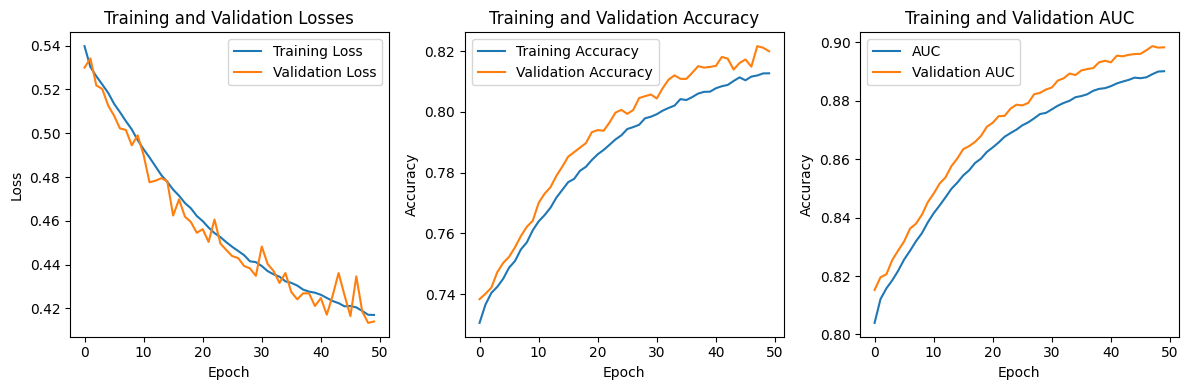

In [ ]:
loss, auc, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation AUC: {auc:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 4))  # Adjust figure size if needed

plt.subplot(1, 3, 1)  # Create subplot for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)  # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Changed to 'auc'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Changed to 'val_auc'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)  # Create subplot for accuracy
plt.plot(history.history['AUC'], label='AUC')  # Changed to 'auc'
plt.plot(history.history['val_AUC'], label='Validation AUC')  # Changed to 'val_auc'
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# Make predictions on the test_df_encoded data for submission
X_test_final = test_df_processed.drop(['LoanID'], axis=1)
# selected_features_test = X_test_final[selected_features]  # Use the same selected features
predicted_probability_final = model.predict(X_test_final)

# Create prediction_df
prediction_df = pd.DataFrame({'LoanID': test_df_processed['LoanID'],
                             'predicted_probability': predicted_probability_final.flatten()})

# Save to CSV for submission
prediction_df.to_csv("prediction_submission_neural_with_sampled_with_feature.csv", index=False)

3420/3420 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [ ]:
from google.colab import files

files.download('prediction_submission_neural_with_sampled_with_feature.csv')

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.047619
1,JDL5RH07AM,0.230231
2,STAL716Y79,0.170320
3,SO0KKJ3IQB,0.684409
4,T99CWTYDCP,0.576034
5,0SNHFWV4UP,0.280462
6,S6ITP6LGYS,0.007583
7,A6I7U12IRJ,0.062617
8,8W6KY50JU4,0.255234
9,THFQ08OLMU,0.077396


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!